In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Orignial Notebook: https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/final_results_gender_test.ipynb
# This notebook author: Reza Chu
# Last Editing Date: 31st May 2019

## Python
import os
import random
import sys

import IPython
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}


In [ ]:
import time
import os
import librosa
from librosa import display
import matplotlib.pyplot as plt

In [ ]:
path1 = '/content/drive/My Drive/data_set/RAVDESS_speech'
path2 = '/content/drive/My Drive/data_set/RAVDESS_song'
path3 = '/content/drive/My Drive/data_set/SAVEE'

In [41]:
#radvass speech
lst = []
count=0
start_time = time.time()
for subdir, dirs, files in os.walk(path1):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

In [ ]:
#radvass song
#lst = []
#count=0
start_time = time.time()
for subdir, dirs, files in os.walk(path2):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

In [42]:
#radvass speech & song
lst = []
count=0
start_time = time.time()

for subdir, dirs, files in os.walk(path1):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

for subdir, dirs, files in os.walk(path2):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

In [ ]:
#savee
for subdir, dirs, files in os.walk(path3):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        count +=1
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #file = int(file[7:8]) - 1 
        #0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised
        # '01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry','06':'fear','07':'disgust','08':'surprised'
        if file.startswith('a'):
            emotion=4
        elif file.startswith('d'):
            emotion=6
        elif file.startswith('f'):
            emotion=5
        elif file.startswith('h'):
            emotion=2
        elif file.startswith('n'):
            emotion=0
        elif file.startswith('sa'):
            emotion=3
        elif file.startswith('su'):
            emotion=7
        arr = mfccs, emotion
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

In [ ]:
#radvass speech & song and savee
lst = []
count=0
start_time = time.time()

for subdir, dirs, files in os.walk(path1):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

for subdir, dirs, files in os.walk(path2):
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

for subdir, dirs, files in os.walk(path3):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        count +=1
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #file = int(file[7:8]) - 1 
        #0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised
        # '01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry','06':'fear','07':'disgust','08':'surprised'
        if file.startswith('a'):
            emotion=4
        elif file.startswith('d'):
            emotion=6
        elif file.startswith('f'):
            emotion=5
        elif file.startswith('h'):
            emotion=2
        elif file.startswith('n'):
            emotion=0
        elif file.startswith('sa'):
            emotion=3
        elif file.startswith('su'):
            emotion=7
        arr = mfccs, emotion
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue



print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1297.0101499557495 seconds ---


In [43]:
count

2452

In [44]:
XX, YY = zip(*lst)

In [45]:
X = pd.DataFrame(XX)
y = pd.DataFrame(YY)

In [46]:
X.shape, y.shape

((2452, 40), (2452, 1))

In [47]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [48]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [49]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [50]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv('/content/drive/My Drive/models/SVM/RAVDESS_speech&song&savee_MFCC_Observed.csv')

In [51]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/My Drive/models/SVM/RAVDESS_speech&song&savee_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.0396273136138916ms
   Unnamed: 0          0          1  ...        38        39  emotion
0        1616 -630.90120  31.904055  ...  1.928447  6.011506        0
1         442 -696.03660  71.580340  ... -2.093748 -1.972943        3
2         510 -451.08190  40.263176  ...  1.641893  2.762313        4
3        2354 -358.12817  58.555763  ...  4.735091  6.497679        4
4         430 -714.21564  72.722084  ... -2.203503 -1.335563        1

[5 rows x 42 columns]


In [52]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/My Drive/models/SVM/RAVDESS_speech_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

data loaded in 0.03586554527282715ms


In [53]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [54]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [55]:
X.shape, y.shape

((1440, 40), (1440,))

In [56]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [57]:
#linear
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel='linear', C=1,gamma='auto'))]


# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)

# Compute and print metrics


print('testing Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)*100))
print('testing Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)*100))

print('training Accuracy with Scaling: {}'.format(svc_scaled.score(X_train, y_train)*100))
print('training Accuracy without Scaling: {}'.format(svc_unscaled.score(X_train, y_train)*100))

testing Accuracy with Scaling: 47.56944444444444
testing Accuracy without Scaling: 48.26388888888889
training Accuracy with Scaling: 63.454861111111114
training Accuracy without Scaling: 66.31944444444444


In [59]:
#tanh
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel='sigmoid', C=1,gamma='auto',coef0=0.0))]


# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel='sigmoid', C=1,gamma='auto',coef0=0.0).fit(X_train, y_train)

# Compute and print metrics
print('testing Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)*100))
print('testing Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)*100))

print('training Accuracy with Scaling: {}'.format(svc_scaled.score(X_train, y_train)*100))
print('training Accuracy without Scaling: {}'.format(svc_unscaled.score(X_train, y_train)*100))

testing Accuracy with Scaling: 32.29166666666667
testing Accuracy without Scaling: 11.458333333333332
training Accuracy with Scaling: 29.07986111111111
training Accuracy without Scaling: 13.802083333333334


In [60]:
#rbf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel='rbf', C=1,gamma='auto'))]


# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, y_train)

# Compute and print metrics
print('testing Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)*100))
print('testing Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)*100))

print('training Accuracy with Scaling: {}'.format(svc_scaled.score(X_train, y_train)*100))
print('training Accuracy without Scaling: {}'.format(svc_unscaled.score(X_train, y_train)*100))

testing Accuracy with Scaling: 52.083333333333336
testing Accuracy without Scaling: 19.791666666666664
training Accuracy with Scaling: 77.69097222222221
training Accuracy without Scaling: 100.0


In [62]:
#polynomial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel='poly', C=1,gamma='auto',coef0=0.0,degree=3))]


# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel='poly', C=1,gamma='auto',coef0=0.0,degree=3).fit(X_train, y_train)

# Compute and print metrics
print('testing Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)*100))
print('testing Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)*100))

print('training Accuracy with Scaling: {}'.format(svc_scaled.score(X_train, y_train)*100))
print('training Accuracy without Scaling: {}'.format(svc_unscaled.score(X_train, y_train)*100))



testing Accuracy with Scaling: 53.47222222222222
testing Accuracy without Scaling: 61.80555555555556
training Accuracy with Scaling: 69.87847222222221
training Accuracy without Scaling: 99.21875


In [63]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 69.87847222222221 ----
----test accuracy score 53.47222222222222 ----


In [ ]:
scaled_predictions = svc_scaled.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.67      0.69      0.68        32
           2       0.52      0.29      0.38        41
           3       0.58      0.39      0.47        36
           4       0.88      0.54      0.67        41
           5       0.80      0.53      0.63        38
           6       0.73      0.49      0.59        49
           7       0.26      0.84      0.40        37

    accuracy                           0.52       288
   macro avg       0.63      0.51      0.53       288
weighted avg       0.64      0.52      0.54       288

----accuracy score 52.083333333333336 ----


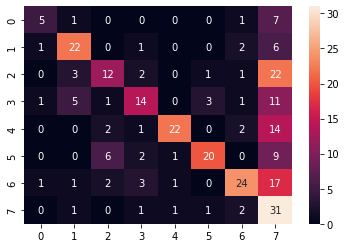

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.84729064 0.92118227 0.87128713 0.90594059 0.89108911]
